# Spam Message Classification

### 1. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data\spam.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
#Check Missing values
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df['label'].value_counts()/(len(df)) * 100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

this is an example of inbalanced dataset

#### Balancing the dataset

In [9]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [13]:
data = pd.concat([ham, spam], ignore_index=True)

In [14]:
data.shape

(1494, 4)

In [15]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

#### EDA

In [16]:
data.head()

,label,message,length,punct
0,ham,Prepare to be pounded every night...,36,3
1,ham,I tot it's my group mate... Lucky i havent rep...,83,10
2,ham,There'll be a minor shindig at my place later ...,70,3
3,ham,Really do hope the work doesnt get stressful. ...,61,2
4,ham,How much are we getting?,24,1


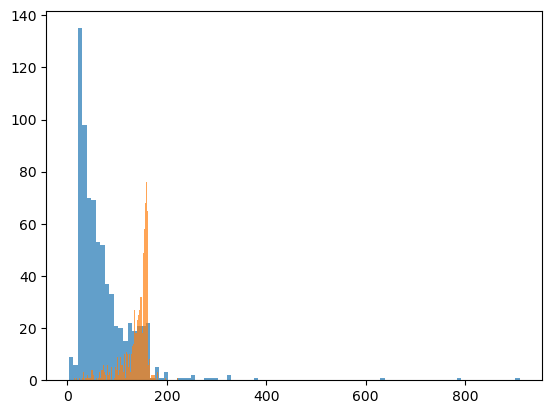

In [17]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100,alpha=0.7)
plt.show()

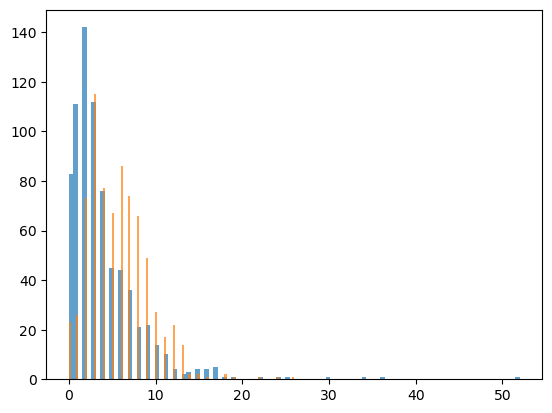

In [18]:
plt.hist(data[data['label'] == 'ham']['punct'], bins=100,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100,alpha=0.7)
plt.show()

### Data splitting

In [19]:
data.head()

,label,message,length,punct
0,ham,Prepare to be pounded every night...,36,3
1,ham,I tot it's my group mate... Lucky i havent rep...,83,10
2,ham,There'll be a minor shindig at my place later ...,70,3
3,ham,Really do hope the work doesnt get stressful. ...,61,2
4,ham,How much are we getting?,24,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'], test_size=0.3, random_state=0)

In [22]:
X_train

1438      You have 1 new message. Please call 08715205273
431     Oops sorry. Just to check that you don't mind ...
194                             I'm coming home 4 dinner.
240           How is it possible to teach you. And where.
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559                                i dnt wnt to tlk wid u
684                      on hen night. Going with a swing
Name: message, Length: 1045, dtype: object

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1045,), (449,), (1045,), (449,))

### 2. Building the Model (Random Forest)

Since, we are dealing with textual data, we have to do some encoding before applying the model

For this we will go with OneEncoding using TD-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [25]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier",RandomForestClassifier(n_estimators=10))])


In [26]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

### 3. Predicting the results (Random Forest)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 

#### Metrics

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
accuracy_score(y_test, y_pred)

0.9309576837416481

In [31]:
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 27, 195]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.98      0.94       227
        spam       0.98      0.88      0.93       222

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



### 4. Building the Model (SVM)

In [33]:
from sklearn.svm import SVC

In [34]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [35]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [36]:
X_train

1438      You have 1 new message. Please call 08715205273
431     Oops sorry. Just to check that you don't mind ...
194                             I'm coming home 4 dinner.
240           How is it possible to teach you. And where.
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559                                i dnt wnt to tlk wid u
684                      on hen night. Going with a swing
Name: message, Length: 1045, dtype: object

### 5. Predicting the result(SVM)

In [37]:
y_pred2 = svm.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred2)

0.9420935412026726

In [39]:
confusion_matrix(y_test, y_pred2)

array([[221,   6],
       [ 20, 202]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         ham       0.92      0.97      0.94       227
        spam       0.97      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



## Testing the models with some random data

In [41]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']
test4 = ['Congrulations for clearing the project. Well done']

In [42]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))
print(classifier.predict(test4))

['ham']
['ham']
['spam']
['ham']


In [43]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))
print(svm.predict(test4))

['ham']
['ham']
['spam']
['ham']
